<a href="https://colab.research.google.com/github/elifftosunn/Ship-Route-Optimization/blob/main/ShipRouteOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/datas/marine.csv")  
df.head()

,ship_name,lat,lon,cog,sog,heading,type,time
0,BENEDIKT,55.71050,12.60567,147,0.1,109,Cargo,2022-09-08 06:16:47
1,WILSON TEES,55.87240,12.65609,160,11.0,157,Cargo,2022-09-08 06:16:47
2,WILSON BRAKE,55.77752,12.67704,184,9.7,182,Cargo,2022-09-08 06:16:47
3,ELBWIND,55.55172,12.70671,176,10.3,180,Cargo,2022-09-08 06:16:47
4,HELEN ANNA,56.08274,12.57780,132,7.1,131,Cargo,2022-09-07 17:54:35


In [ ]:
df.head()

,ship_name,lat,lon,cog,sog,heading,type,time
0,BENEDIKT,55.71050,12.60567,147,0.1,109,Cargo,2022-09-08 06:16:47
1,WILSON TEES,55.87240,12.65609,160,11.0,157,Cargo,2022-09-08 06:16:47
2,WILSON BRAKE,55.77752,12.67704,184,9.7,182,Cargo,2022-09-08 06:16:47
3,ELBWIND,55.55172,12.70671,176,10.3,180,Cargo,2022-09-08 06:16:47
4,HELEN ANNA,56.08274,12.57780,132,7.1,131,Cargo,2022-09-07 17:54:35


In [ ]:
df.shape

(20590, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20590 entries, 0 to 20589
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ship_name  20590 non-null  object 
 1   lat        20590 non-null  float64
 2   lon        20590 non-null  float64
 3   cog        20590 non-null  int64  
 4   sog        20590 non-null  float64
 5   heading    20590 non-null  int64  
 6   type       20590 non-null  object 
 7   time       20590 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df["time"] = pd.to_datetime(df["time"])

In [ ]:
type(df.iloc[0,7])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.describe()

,lat,lon,cog,sog,heading
count,20590.000000,20590.000000,20590.000000,20590.000000,20590.000000
mean,55.900707,12.636257,158.688295,9.493463,164.410102
std,0.190408,0.109531,26.208925,3.456059,47.091785
min,55.187140,12.022500,60.000000,0.100000,0.000000
25%,55.746628,12.611990,133.000000,8.200000,134.000000
50%,55.913915,12.661385,165.000000,9.800000,165.000000
75%,56.066305,12.691830,178.000000,11.600000,177.000000
max,56.386880,13.141470,200.000000,21.300000,511.000000


In [ ]:
quantiles = [0.1,0.2,0.4,0.5,0.65,0.75,0.85,0.95,0.99]
print(df.heading.describe(quantiles))

count    20590.000000
mean       164.410102
std         47.091785
min          0.000000
10%        128.000000
20%        131.000000
40%        159.000000
50%        165.000000
65%        174.000000
75%        177.000000
85%        185.000000
95%        196.000000
99%        357.000000
max        511.000000
Name: heading, dtype: float64


In [ ]:
len(df)*0.01

205.9

In [ ]:
ninetyNinePercent = df.sort_values("heading",ascending=False).iloc[205:] 
ninetyNinePercent

,ship_name,lat,lon,cog,sog,heading,type,time
11066,FENJA,56.02977,12.69190,194,0.4,357,Cargo,2022-09-10 01:45:20
10825,FENJA,56.02978,12.69192,199,0.1,357,Cargo,2022-09-09 16:45:47
10952,FENJA,56.02977,12.69188,197,0.1,357,Cargo,2022-09-09 19:34:18
10513,FENJA,56.02969,12.69188,183,0.1,357,Cargo,2022-09-09 23:56:40
10751,FENJA,56.02978,12.69188,191,0.2,357,Cargo,2022-09-09 17:45:54
...,...,...,...,...,...,...,...,...
14286,DETTIFOSS,56.02915,12.69166,181,0.9,0,Cargo,2022-09-08 14:56:34
17130,AMAK SWAN,55.69077,12.93813,189,1.0,0,Tankers,2022-09-10 18:51:18
16852,RAMANDA,55.96309,12.73049,102,0.1,0,Tankers,2022-09-10 19:27:30
15728,RAMANDA,55.96307,12.73029,102,0.1,0,Tankers,2022-09-11 13:03:40


In [ ]:
ninetyNinePercent = ninetyNinePercent.sort_values("heading",ascending=True).iloc[205:]

In [ ]:
quantiles = [0.1,0.2,0.4,0.5,0.65,0.75,0.85,0.95,0.99]
print(ninetyNinePercent.heading.describe(quantiles))

count    20180.000000
mean       162.407532
std         31.470116
min         77.000000
10%        129.000000
20%        131.000000
40%        159.000000
50%        165.000000
65%        174.000000
75%        177.000000
85%        184.000000
95%        194.000000
99%        328.000000
max        357.000000
Name: heading, dtype: float64


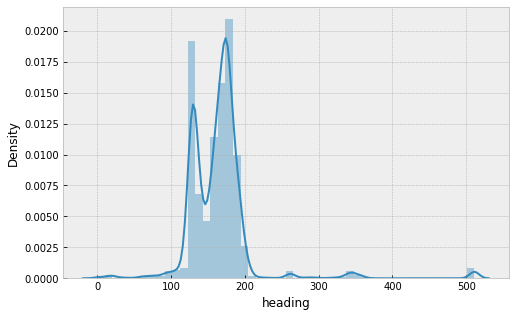

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df["heading"])

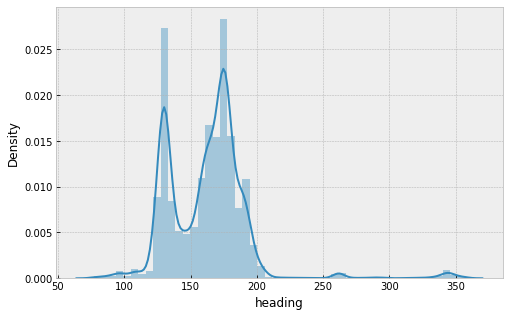

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(ninetyNinePercent["heading"])

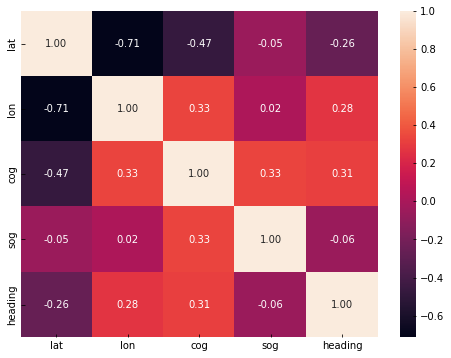

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, fmt = ".2f" ,cmap = "rocket")

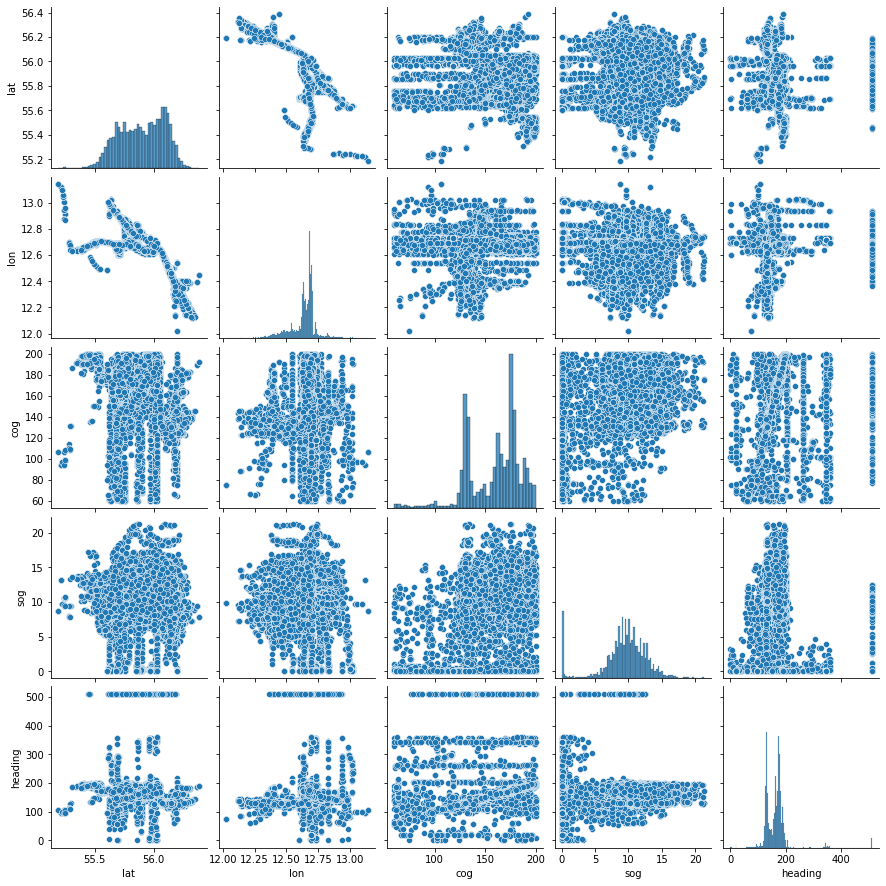

In [ ]:
sns.pairplot(df)

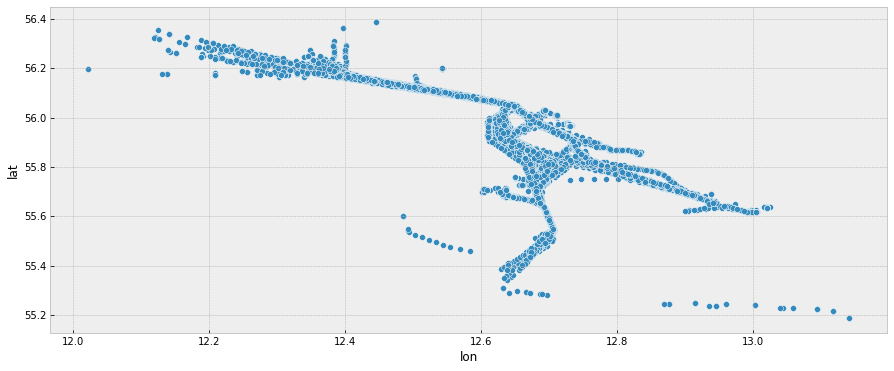

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(15,6))
sns.scatterplot(df.lon, df.lat)

In [ ]:
for col in df.columns:
  print(col," : ",df[col].nunique())

ship_name  :  286
lat  :  16604
lon  :  12480
cog  :  141
sog  :  208
heading  :  280
type  :  2
time  :  4619


In [ ]:
def colCategorization(limit):
  num_cols = [col for col in df.columns if df[col].dtype != "O" and col != "time" and df[col].nunique() > limit] 
  cat_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() <= limit]     
  num_but_cat = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() <= limit] 
  cat_but_num = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() > limit] 
  cat_cols = cat_cols + num_but_cat 
  return num_cols, cat_cols, cat_but_num 
num_cols, cat_cols, cat_but_num = colCategorization(15)
print("Numeric Columns: {}\nCategoric Columns: {}\nCategoric but Numeric Columns: {}".format(num_cols, cat_cols, cat_but_num))

Numeric Columns: ['lat', 'lon', 'cog', 'sog', 'heading']
Categoric Columns: ['type']
Categoric but Numeric Columns: ['ship_name']


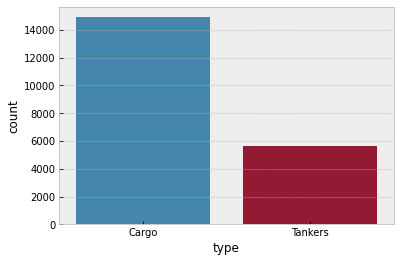

In [ ]:
sns.countplot(df["type"])

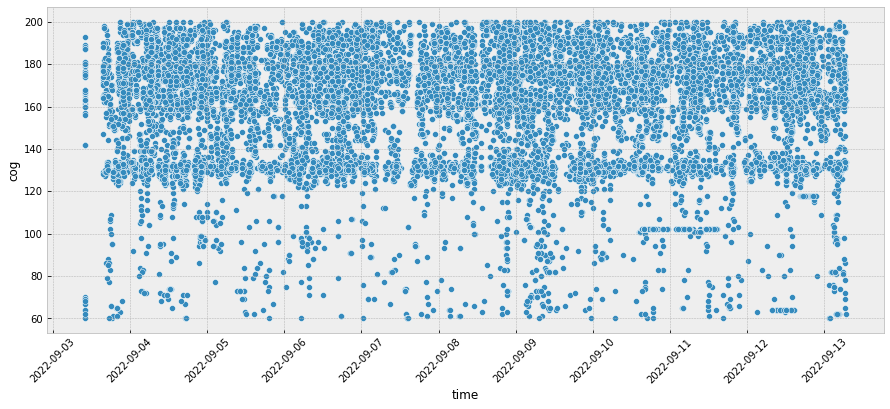

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
sns.scatterplot(df.time, df.cog)

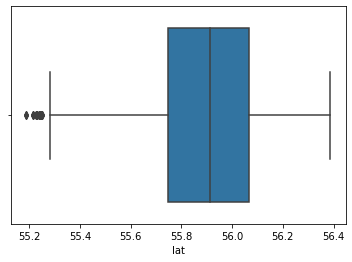


lat : 32


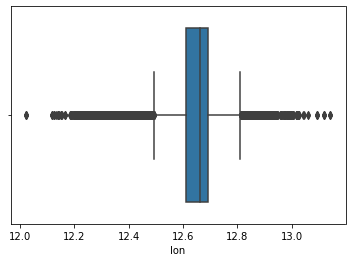


lon : 3025


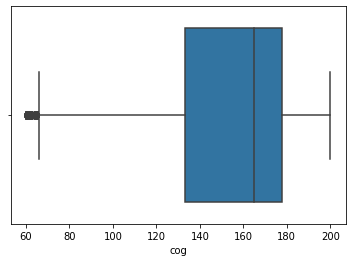


cog : 138


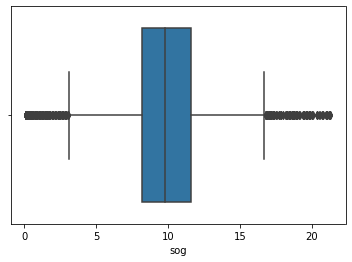


sog : 1670


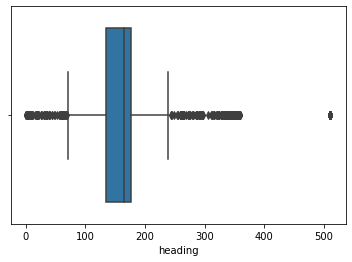


heading : 761


In [ ]:
def outlierLimit(df,col,q1, q3):
  q1 = df[col].quantile(q1)
  q3 = df[col].quantile(q3)
  iqr = q3 - q1
  lowerLimit = q1 - iqr * 1.5
  upperLimit = q3 + iqr * 1.5
  return lowerLimit, upperLimit
def outlierControl(df, col, q1, q3):
  lowerLimit, upperLimit = outlierLimit(df, col, q1, q3)
  outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
  if outlierDf.any(axis = None):
    sns.boxplot(df[col])
    plt.show()
    return "\n" + col+" : "+str(len(outlierDf))
  else: 
    return "\n" + col +" : "+ str(False) 

for col in num_cols:
  print(outlierControl(df,col,q1=0.25, q3 = 0.75))

In [ ]:
len(df)

20590


lat : False


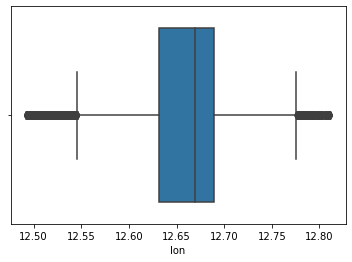


lon : 1243


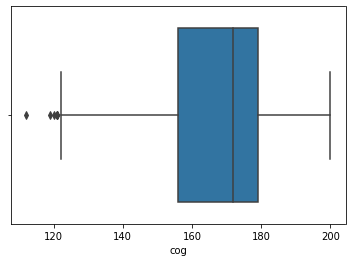


cog : 7


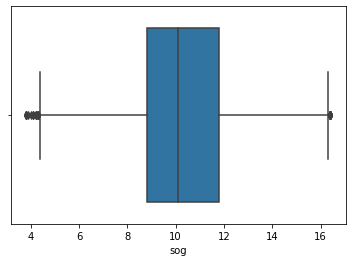


sog : 46

heading : False


In [ ]:
def outlierValues(df, col, q1, q3):
  lowerLimit, upperLimit = outlierLimit(df, col, q1, q3)
  df = df.loc[(df[col] > lowerLimit) & (df[col] < upperLimit)]

for col in num_cols:
  lowerLimit, upperLimit = outlierLimit(df, col, q1 = 0.25, q3 = 0.75)
  df = df.loc[(df[col] > lowerLimit) & (df[col] < upperLimit)]
for col in num_cols:
  print(outlierControl(df,col,q1=0.25, q3 = 0.75))

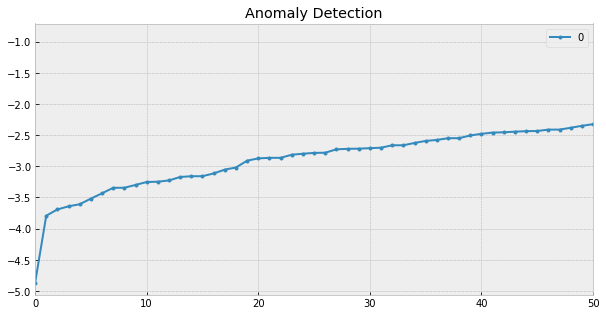

Result: [-4.87135296 -3.79288782 -3.69161262 -3.64192673 -3.60836965 -3.51807567
 -3.43307176 -3.34475668 -3.34413438 -3.298748   -3.25182152 -3.24695674
 -3.22634793 -3.17089969 -3.15916665 -3.15814069 -3.11463071 -3.05301357
 -3.01900156 -2.909131   -2.87294714 -2.86364684 -2.86363761 -2.81390668
 -2.79794034 -2.7847143  -2.78158491 -2.72739692 -2.71963559 -2.71658188
 -2.70881745 -2.70115583 -2.66223905 -2.66223905 -2.62504844 -2.59236711
 -2.57661154 -2.54948863 -2.54805931 -2.50481666 -2.47829916 -2.45873405
 -2.45404375 -2.44393675 -2.43608455 -2.43304143 -2.41078062 -2.41077752
 -2.38121724 -2.35001624]
DataFrame Scores: [-1.04620511 -1.0180002  -1.40225016 ... -1.10507242 -0.96702696
 -0.99147272]



In [ ]:
# Unsupervised Outlier Detection
from sklearn.neighbors import LocalOutlierFactor
dropCols = cat_cols + cat_but_num + ["time"]
def localOutlierFactor(df, neighbors = None, percent = None, plot_xlim = None): # Unsupervised Algorithm
    # 1: Not Outlier, -1: Outlier    
    lof = LocalOutlierFactor(n_neighbors = neighbors, contamination=percent)
    lof.fit_predict(df.drop(dropCols, axis = 1))
    df_scores = lof.negative_outlier_factor_
    plt.style.use("bmh")
    pd.DataFrame(np.sort(df_scores)).plot(stacked = True, xlim = [0,plot_xlim], style = ".-", figsize = (10,5), title = "Anomaly Detection")
    plt.show()
    result = np.sort(df_scores)[0:plot_xlim]
    return result,df_scores
result,df_scores = localOutlierFactor(df, neighbors=20, percent = 0.1, plot_xlim = 50)
print("Result: {}\nDataFrame Scores: {}\n".format(result, df_scores))

on all data rate:  0.9987971638389466


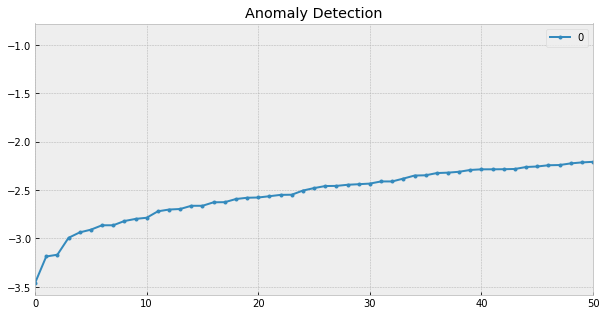

Result: [-3.45952646 -3.18612802 -3.16780911 -2.99321695 -2.93720455 -2.909131
 -2.86364684 -2.86363761 -2.81993052 -2.79794034 -2.78592663 -2.71963559
 -2.70115583 -2.6955016  -2.66223905 -2.66223905 -2.62618164 -2.62499799
 -2.59236711 -2.57937834 -2.57661154 -2.563504   -2.54948863 -2.54805931
 -2.50481666 -2.47947318 -2.45837881 -2.45679921 -2.44521943 -2.43931359
 -2.43304143 -2.41078062 -2.41077752 -2.38121724 -2.35001624 -2.34719428
 -2.32411743 -2.31997345 -2.31071269 -2.29203972 -2.28555784 -2.2853911
 -2.28441139 -2.28194109 -2.2616152  -2.25630265 -2.24343703 -2.24126437
 -2.22433091 -2.21411926]



In [ ]:
print("on all data rate: ",df.drop(df[df_scores <  -3.01900156].index, axis = 0).reset_index(drop=True).shape[0]/len(df))
df = df.drop(df[df_scores <  -3.01900156].index, axis = 0).reset_index(drop = True)
result,df_scores = localOutlierFactor(df, neighbors=20, percent = 0.1, plot_xlim = 50)
print("Result: {}\n".format(result))

In [ ]:
len(df)

15777

<Figure size 432x288 with 0 Axes>

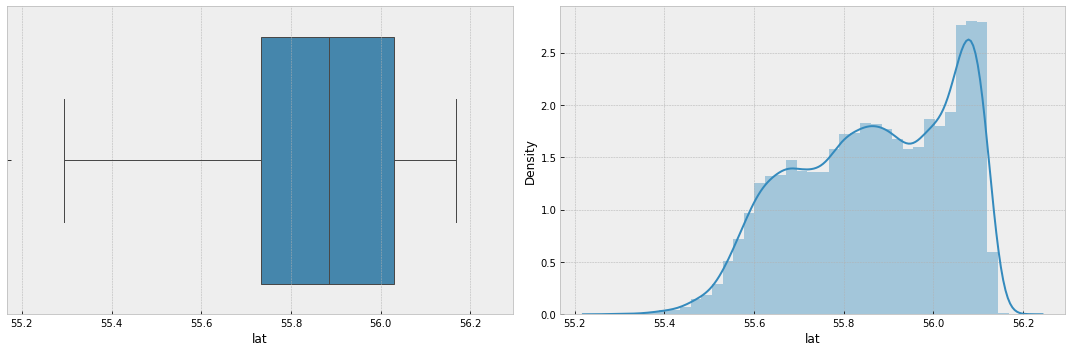

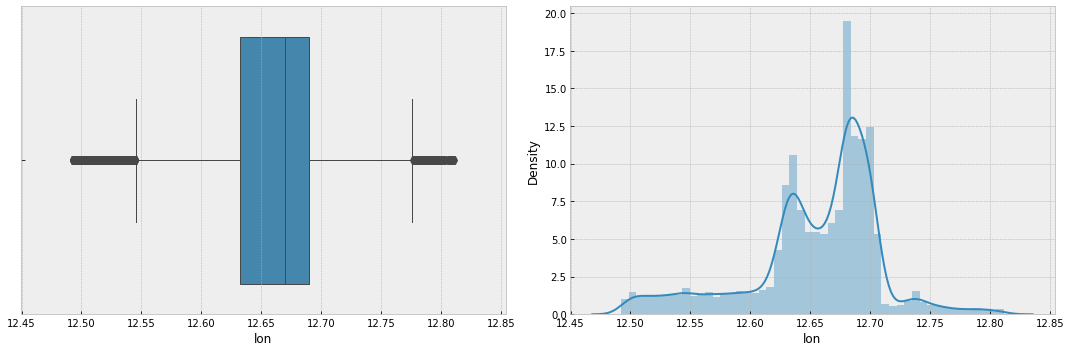

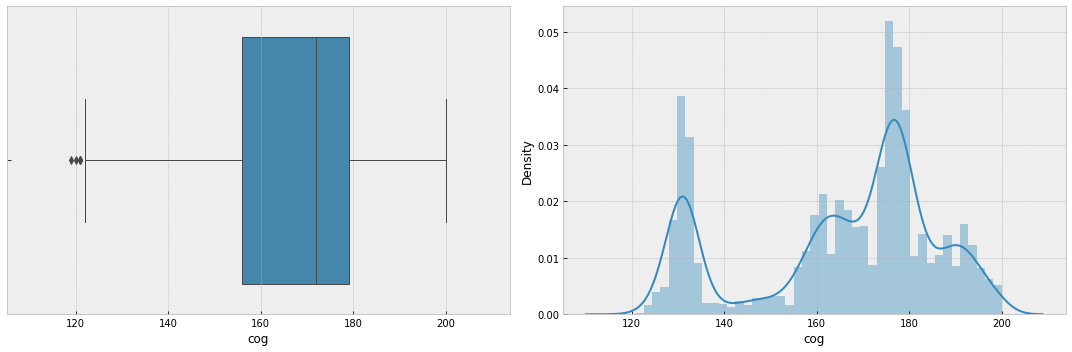

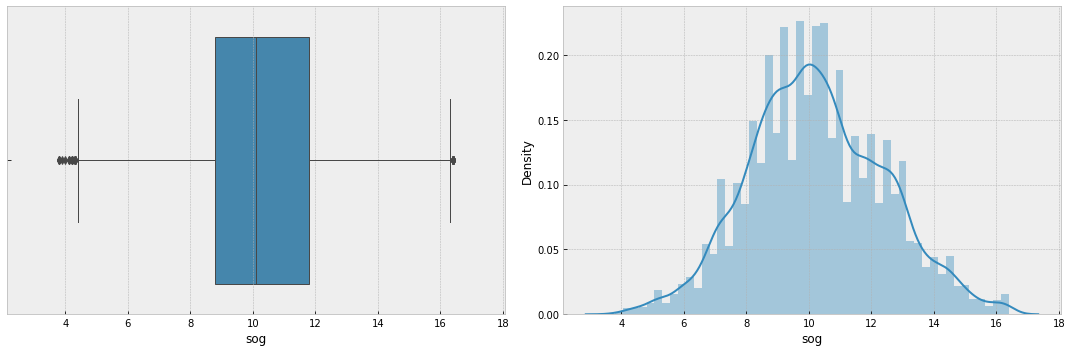

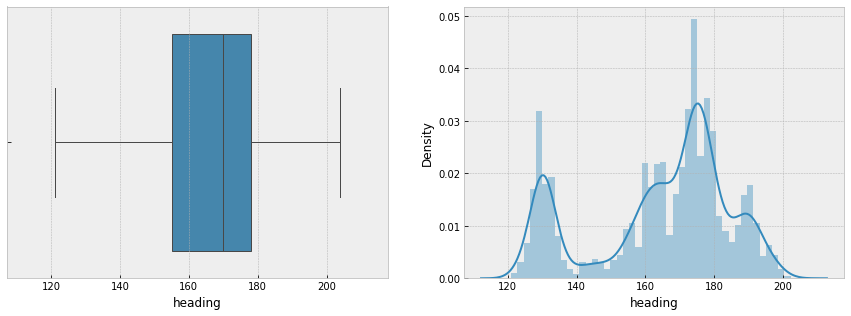

In [ ]:
for col in num_cols:
    plt.tight_layout()
    fig, (ax_box, ax_hist) = plt.subplots(1,2, sharex = True, figsize = (15,5))
    sns.boxplot(df[col], ax = ax_box, linewidth = 1)
    sns.distplot(df[col], ax = ax_hist)

In [ ]:
dfCopy = df.copy()
dfCopy.head()

,ship_name,lat,lon,cog,sog,heading,type,time
0,WILSON TEES,55.87240,12.65609,160,11.0,157,Cargo,2022-09-08 06:16:47
1,WILSON BRAKE,55.77752,12.67704,184,9.7,182,Cargo,2022-09-08 06:16:47
2,ELBWIND,55.55172,12.70671,176,10.3,180,Cargo,2022-09-08 06:16:47
3,HELEN ANNA,56.08274,12.57780,132,7.1,131,Cargo,2022-09-07 17:54:35
4,SAND TOPIC,55.94495,12.71476,156,13.3,155,Cargo,2022-09-07 17:54:35


In [ ]:
df = df.drop("time", axis = 1)
df.head()

,ship_name,lat,lon,cog,sog,heading,type
0,WILSON TEES,55.87240,12.65609,160,11.0,157,Cargo
1,WILSON BRAKE,55.77752,12.67704,184,9.7,182,Cargo
2,ELBWIND,55.55172,12.70671,176,10.3,180,Cargo
3,HELEN ANNA,56.08274,12.57780,132,7.1,131,Cargo
4,SAND TOPIC,55.94495,12.71476,156,13.3,155,Cargo


In [ ]:
df["lat/lon"] = df.lat/df.lon
df["cog/sog"] = df.cog/df.sog 
df["heading/sog"] = df.heading/df.sog
df["heading/cog"] = df.heading/df.cog 
df["heading/lat"] = df.heading/df.lat
df["heading/lon"] = df.heading/df.lon
df["cog/lat"] = df.cog/df.lat
df["cog/lon"] = df.cog/df.lon  
df["lat/sog"] = df.lat/df.sog 
df["lon/sog"] = df.lon/df.sog
df.head()

,ship_name,lat,lon,cog,sog,heading,type,lat/lon,cog/sog,heading/sog,heading/cog,heading/lat,heading/lon,cog/lat,cog/lon,lat/sog,lon/sog
0,WILSON TEES,55.87240,12.65609,160,11.0,157,Cargo,4.414665,14.545455,14.272727,0.981250,2.809974,12.405095,2.863668,12.642135,5.079309,1.150554
1,WILSON BRAKE,55.77752,12.67704,184,9.7,182,Cargo,4.399885,18.969072,18.762887,0.989130,3.262963,14.356664,3.298820,14.514429,5.750260,1.306911
2,ELBWIND,55.55172,12.70671,176,10.3,180,Cargo,4.371841,17.087379,17.475728,1.022727,3.240224,14.165744,3.168219,13.850950,5.393371,1.233661
3,HELEN ANNA,56.08274,12.57780,132,7.1,131,Cargo,4.458867,18.591549,18.450704,0.992424,2.335835,10.415176,2.353665,10.494681,7.898977,1.771521
4,SAND TOPIC,55.94495,12.71476,156,13.3,155,Cargo,4.400000,11.729323,11.654135,0.993590,2.770581,12.190556,2.788455,12.269205,4.206387,0.955997


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df["ship_name"] = le.fit_transform(df["ship_name"])
df.head()

,ship_name,lat,lon,cog,sog,heading,type,lat/lon,cog/sog,heading/sog,heading/cog,heading/lat,heading/lon,cog/lat,cog/lon,lat/sog,lon/sog
0,267,55.87240,12.65609,160,11.0,157,0,4.414665,14.545455,14.272727,0.981250,2.809974,12.405095,2.863668,12.642135,5.079309,1.150554
1,256,55.77752,12.67704,184,9.7,182,0,4.399885,18.969072,18.762887,0.989130,3.262963,14.356664,3.298820,14.514429,5.750260,1.306911
2,69,55.55172,12.70671,176,10.3,180,0,4.371841,17.087379,17.475728,1.022727,3.240224,14.165744,3.168219,13.850950,5.393371,1.233661
3,104,56.08274,12.57780,132,7.1,131,0,4.458867,18.591549,18.450704,0.992424,2.335835,10.415176,2.353665,10.494681,7.898977,1.771521
4,202,55.94495,12.71476,156,13.3,155,0,4.400000,11.729323,11.654135,0.993590,2.770581,12.190556,2.788455,12.269205,4.206387,0.955997


Cargo: 0 /
Tanker: 1

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["lat","lon","type"], axis = 1).values 
y = df[["lat","lon","type"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train.shape: {}\nX_test.shape: {}\ny_train.shape: {}\ny_test.shape: {}\n".format(X_train.shape,
                                                                                            X_test.shape,
                                                                                            y_train.shape,
                                                                                            y_test.shape))

X_train.shape: (11043, 14)
X_test.shape: (4734, 14)
y_train.shape: (11043, 3)
y_test.shape: (4734, 3)



In [ ]:
X_test

array([[ 0.10051058,  0.41046169,  1.03207758, ...,  0.4034886 ,
        -0.92544452, -0.9143626 ],
       [ 1.57515072,  0.60560241, -0.34777166, ...,  0.60281475,
         0.10902324,  0.12708817],
       [-0.22287541, -1.68730097, -0.89971135, ..., -1.64502565,
         0.76170794,  0.69215359],
       ...,
       [ 1.44579632, -1.29701954,  0.06618312, ..., -1.3107286 ,
        -0.2426586 , -0.26026958],
       [ 1.25176472,  0.8495283 ,  0.94008763, ...,  0.88301549,
        -0.85497009, -0.87296717],
       [-1.65870923, -0.71159741, -1.45165105, ..., -0.74393288,
         1.58426178,  1.60055123]])

In [ ]:
X_train

array([[-1.29651692e+00,  5.08032049e-01, -2.09786732e-01, ...,
         4.90544090e-01, -3.44819919e-02,  5.25513455e-04],
       [-6.36809488e-01, -1.58973061e+00, -1.68162592e+00, ...,
        -1.59823641e+00,  2.03247348e+00,  2.00577778e+00],
       [ 7.46397016e-02, -1.78487133e+00, -5.77746528e-01, ...,
        -1.75642411e+00,  3.76058549e-01,  3.18241880e-01],
       ...,
       [ 2.68671299e-01,  1.28859490e+00,  1.12406753e+00, ...,
         1.28132861e+00, -9.73397574e-01, -9.61318282e-01],
       [ 1.54927984e+00,  4.59246871e-01, -8.99711351e-01, ...,
         4.48659629e-01,  7.21432451e-01,  7.57780450e-01],
       [ 1.56221528e+00,  5.56817228e-01, -4.39761605e-01, ...,
         5.42308665e-01,  2.03024245e-01,  2.25964126e-01]])

RMSE value for k=  1 is: 0.23405839349581728  Train Accuracy:  1.0  Test Accuracy:  0.6706741361683708
RMSE value for k=  2 is: 0.21755474764450858  Train Accuracy:  0.9128990151064723  Test Accuracy:  0.7165777474682814
RMSE value for k=  3 is: 0.21479967912815132  Train Accuracy:  0.8707677358196824  Test Accuracy:  0.723081100830068
RMSE value for k=  4 is: 0.2138893608108625  Train Accuracy:  0.8439138017066123  Test Accuracy:  0.7245352050257171
RMSE value for k=  5 is: 0.21472103197282688  Train Accuracy:  0.8237018442113113  Test Accuracy:  0.7215848426574003
RMSE value for k=  6 is: 0.2156540994763746  Train Accuracy:  0.8073054012467278  Test Accuracy:  0.7183388702937932
RMSE value for k=  7 is: 0.21643561706739664  Train Accuracy:  0.7937516489894403  Test Accuracy:  0.7162886725395924
RMSE value for k=  8 is: 0.21824477840261972  Train Accuracy:  0.7818110327138855  Test Accuracy:  0.711029753504827
RMSE value for k=  9 is: 0.21946390418055808  Train Accuracy:  0.7718314577

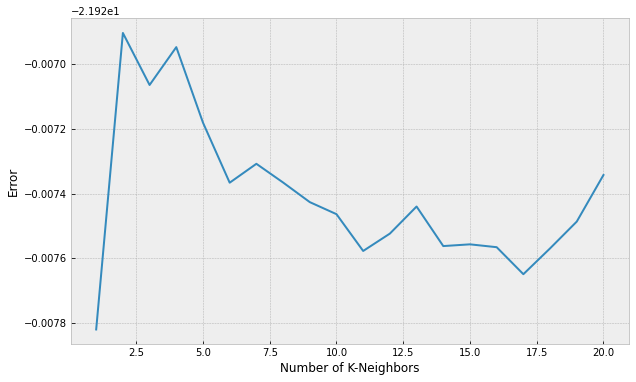

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.model_selection import cross_val_predict

rmse_val, scoresList, neighbors = [], [], [] #to store rmse values for different k
for K in range(20):
    K = K+1
    neighbors.append(K)
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    scores = cross_val_predict(model, X_train, y_train, cv = 10)
    scoresList.append(scores.mean())
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, " Train Accuracy: ",model.score(X_train, y_train)," Test Accuracy: ",model.score(X_test,y_test))

mse = [1-x for x in scoresList]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of K-Neighbors = %d" %optimal_k)

plt.figure(figsize=(10,6))
plt.plot(neighbors, mse)
plt.xlabel("Number of K-Neighbors")
plt.ylabel("Error")
plt.show()

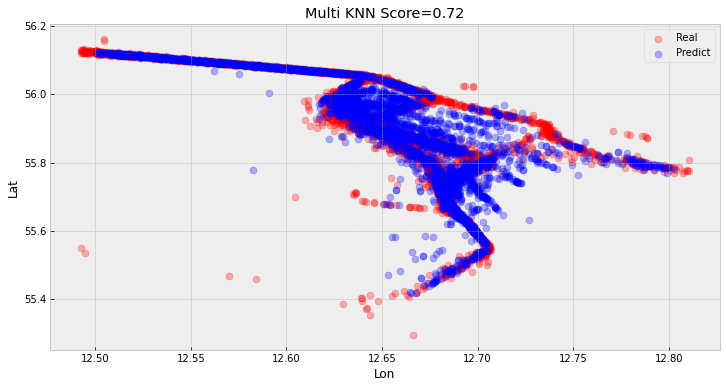


    Real_Lat  Real_Lon  Real_Type   Pred_Lat   Pred_Lon  Pred_Type
0  55.72775  12.67963        1.0  55.715023  12.688368       0.50
1  55.76487  12.67820        0.0  55.739992  12.678745       0.00
2  56.11400  12.51862        0.0  56.114263  12.516163       0.00
3  55.78740  12.70001        1.0  55.802865  12.701253       0.25
4  55.99342  12.66932        0.0  55.941170  12.658027       0.00

MSE: 0.04574865866807932
MAE: 0.08774400788621317
RMSE: 0.2962161506167636
R2 Score: 0.7245352050257171
Model Train Accuracy: 0.8439138017066123
Model Test Accuracy: 0.7245352050257171


In [ ]:
def modelVisualization(y_test, y_pred, model, modelName):
  plt.figure(figsize = (12,6))
  s = 50
  a = 0.3
  plt.scatter(
      y_test[:, 1],
      y_test[:, 0],
      color = "red",
      s=s,
      alpha=a,
      label="Real"
  )
  plt.scatter(
      y_pred[:, 1],
      y_pred[:, 0],
      color = "blue",
      s=s,
      alpha=a,
      label="Predict"
  )
  plt.xlabel("Lon")
  plt.ylabel("Lat")
  plt.title("Multi {} Score={}".format(modelName, round(model.score(X_test, y_test),2)))
  plt.legend()
  plt.show() 


knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
modelVisualization(y_test, y_pred, knn, "KNN")
realDf = pd.DataFrame(y_test, columns = ["Real_Lat","Real_Lon","Real_Type"])
predDf = pd.DataFrame(y_pred, columns = ["Pred_Lat","Pred_Lon","Pred_Type"]) 
resultDf = pd.concat([realDf,predDf], axis = 1)
print("\n",resultDf.head())
print("\nMSE: {}\nMAE: {}\nRMSE: {}\nR2 Score: {}\nModel Train Accuracy: {}\nModel Test Accuracy: {}".format(mean_squared_error(y_test, y_pred),
                                                                                                   mean_absolute_error(y_test, y_pred),
                                                                                                   np.sqrt(mean_absolute_error(y_test, y_pred)),
                                                                                                   r2_score(y_test, y_pred),
                                                                                                   knn.score(X_train, y_train),
                                                                                                   knn.score(X_test, y_test)))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

pca = PCA()
KNN = KNeighborsRegressor()
pipeline = Pipeline(steps=[("pca", pca),
                       ("KNN", KNN)])
parameters = dict(pca__n_components=list(range(1,X_train.shape[1]+1,1)),
                  KNN__n_neighbors=[2, 3, 5, 10],
                  KNN__algorithm=["auto",  "ball_tree", "kd_tree", "brute"])
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(clf.best_estimator_.get_params()["KNN"])

CV_Result = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1, scoring="r2")
print("Cv Result Mean: {}\nCv Result Std: {}\nTrain Accuracy: {}\nTest Accuracy: {}".format(CV_Result.mean(), CV_Result.std(), clf.score(X_train, y_train),
                                                                                            clf.score(X_test, y_test)))

Best Number Of Components: 5
KNeighborsRegressor()
Cv Result Mean: 0.6922566596274714
Cv Result Std: 0.008400863858433274
Train Accuracy: 0.8232655060046912
Test Accuracy: 0.7213236371639686


   Real_Lat  Real_Lon  Real_Type   Pred_Lat   Pred_Lon  Pred_Type
0  55.72775  12.67963        1.0  55.733912  12.690088        0.6
1  55.76487  12.67820        0.0  55.748232  12.678436        0.0
2  56.11400  12.51862        0.0  56.114594  12.515946        0.0
3  55.78740  12.70001        1.0  55.800536  12.700720        0.2
4  55.99342  12.66932        0.0  55.934552  12.655194        0.0

MSE: 0.04610512157147575
MAE: 0.09213073257287807
RMSE: 0.21472103197282688
CV Mean: 22.927181350418063
CV STD: 23.838965854931264
R2 Score: 0.7215848426574003
Train Accuracy: 0.8237018442113113
Test Accuracy: 0.7215848426574003



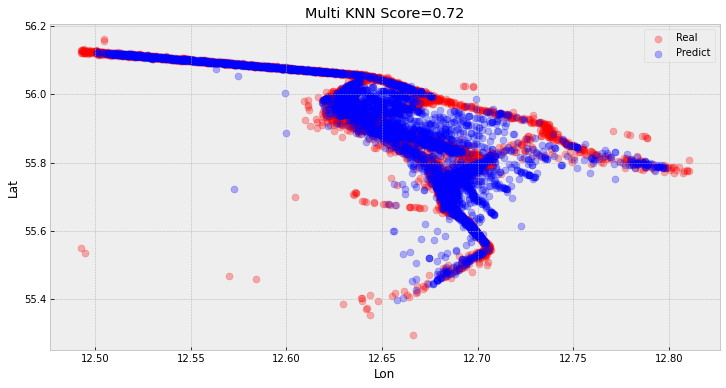

In [ ]:
def modelKNN():
  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test) 
  realDf = pd.DataFrame(y_test, columns = ["Real_Lat","Real_Lon","Real_Type"])
  predDf = pd.DataFrame(y_pred, columns = ["Pred_Lat", "Pred_Lon","Pred_Type"])
  resultDf = pd.concat([realDf,predDf], axis = 1)
  print(resultDf.head())
  scores = cross_val_predict(knn,X_train, y_train, cv = 10)
  print("\nMSE: {}\nMAE: {}\nRMSE: {}\nCV Mean: {}\nCV STD: {}\nR2 Score: {}\nTrain Accuracy: {}\nTest Accuracy: {}\n".format(mean_squared_error(y_test, y_pred),
                                                                                                                              mean_absolute_error(y_test, y_pred),
                                                                                                                              np.sqrt(mean_squared_error(y_test, y_pred)),
                                                                                                                              scores.mean(), 
                                                                                                                              scores.std(),
                                                                                                                              r2_score(y_test, y_pred),
                                                                                                                              knn.score(X_train, y_train),
                                                                                                                              knn.score(X_test, y_test)))
  modelVisualization(y_test, y_pred, knn, "KNN")

modelKNN()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def modelRandomForestGridSearchCV():
  rfr = RandomForestRegressor()
  parameters = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
            }
  gridSearchCV = GridSearchCV(rfr, param_grid = parameters)
  gridSearchCV.fit(X_train, y_train)
  bestParams = gridSearchCV.best_params_
  bestResult = gridSearchCV.best_score_
  print("Best Parameters: {}\nBest Result: {}".format(bestParams, bestResult))
modelRandomForestGridSearchCV()

Best Parameters: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Best Result: 0.8468977311292871


   Real_Lat  Real_Lon  Real_Type   Pred_Lat   Pred_Lon  Pred_Type
0  55.72775  12.67963        1.0  55.770855  12.694399   0.900000
1  55.76487  12.67820        0.0  55.774652  12.680924   0.033333
2  56.11400  12.51862        0.0  56.114603  12.519546   0.033333
3  55.78740  12.70001        1.0  55.781302  12.697416   1.000000
4  55.99342  12.66932        0.0  55.916741  12.651264   0.033333

MSE: 0.01998623033948779
MAE: 0.05978549375674847
RMSE: 0.14137266475343735
CV Mean: 0.857959048046039
CV STD: 0.008570338001557683
R2 Score: 0.8788897631274475
Train Accuracy: 0.9797929873251864
Test Accuracy: 0.8788897631274475



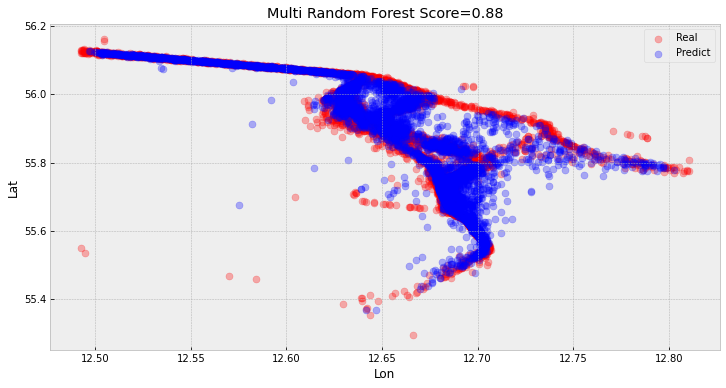

In [ ]:
rfr = RandomForestRegressor(bootstrap = True, max_features = "auto", min_samples_split = 2, n_estimators = 30)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
scores = cross_val_score(rfr,X_train, y_train, cv = 10, scoring = "r2")
realDf = pd.DataFrame(y_test, columns = ["Real_Lat","Real_Lon","Real_Type"])
predDf = pd.DataFrame(y_pred, columns = ["Pred_Lat", "Pred_Lon","Pred_Type"])
resultDf = pd.concat([realDf,predDf], axis = 1)
print(resultDf.head())
print("\nMSE: {}\nMAE: {}\nRMSE: {}\nCV Mean: {}\nCV STD: {}\nR2 Score: {}\nTrain Accuracy: {}\nTest Accuracy: {}\n".format(mean_squared_error(y_test, y_pred),
                                                                                                                              mean_absolute_error(y_test, y_pred),
                                                                                                                              np.sqrt(mean_squared_error(y_test, y_pred)),
                                                                                                                              scores.mean(),
                                                                                                                              scores.std(),
                                                                                                                              r2_score(y_test, y_pred),
                                                                                                                              rfr.score(X_train, y_train),
                                                                                                                              rfr.score(X_test, y_test)))
modelVisualization(y_test, y_pred, rfr, "Random Forest")

In [ ]:
resultDfCopy = resultDf
resultDfCopy

,Real_Lat,Real_Lon,Real_Type,Pred_Lat,Pred_Lon,Pred_Type
0,55.72775,12.67963,1.0,55.770855,12.694399,0.900000
1,55.76487,12.67820,0.0,55.774652,12.680924,0.033333
2,56.11400,12.51862,0.0,56.114603,12.519546,0.033333
3,55.78740,12.70001,1.0,55.781302,12.697416,1.000000
4,55.99342,12.66932,0.0,55.916741,12.651264,0.033333
...,...,...,...,...,...,...
4729,55.74569,12.67730,0.0,55.751756,12.678933,0.033333
4730,55.73294,12.67988,0.0,55.777088,12.692592,0.066667
4731,56.05638,12.64079,0.0,56.052641,12.640102,0.333333
4732,56.01910,12.63329,0.0,55.989015,12.630313,0.100000


In [ ]:
tankersDf = resultDfCopy.loc[resultDfCopy.Pred_Type >= .5]
cargoDf = resultDfCopy.loc[resultDfCopy.Pred_Type < .5]
cargoDf

,Real_Lat,Real_Lon,Real_Type,Pred_Lat,Pred_Lon,Pred_Type
1,55.76487,12.67820,0.0,55.774652,12.680924,0.033333
2,56.11400,12.51862,0.0,56.114603,12.519546,0.033333
4,55.99342,12.66932,0.0,55.916741,12.651264,0.033333
5,55.85247,12.67342,0.0,55.852307,12.673905,0.000000
6,55.91472,12.62595,0.0,55.930341,12.648763,0.433333
...,...,...,...,...,...,...
4728,56.12907,12.49342,0.0,56.125391,12.497046,0.300000
4729,55.74569,12.67730,0.0,55.751756,12.678933,0.033333
4730,55.73294,12.67988,0.0,55.777088,12.692592,0.066667
4731,56.05638,12.64079,0.0,56.052641,12.640102,0.333333


In [ ]:
cargoDf[["Pred_Lat","Pred_Lon","Pred_Type"]]

,Pred_Lat,Pred_Lon,Pred_Type
1,55.774652,12.680924,0.033333
2,56.114603,12.519546,0.033333
4,55.916741,12.651264,0.033333
5,55.852307,12.673905,0.000000
6,55.930341,12.648763,0.433333
...,...,...,...
4728,56.125391,12.497046,0.300000
4729,55.751756,12.678933,0.033333
4730,55.777088,12.692592,0.066667
4731,56.052641,12.640102,0.333333


In [ ]:
tankersDf["Pred_Type"] = "Tankers"
cargoDf["Pred_Type"] = "Cargo"
tankersDf

,Real_Lat,Real_Lon,Real_Type,Pred_Lat,Pred_Lon,Pred_Type
0,55.72775,12.67963,1.0,55.770855,12.694399,Tankers
3,55.78740,12.70001,1.0,55.781302,12.697416,Tankers
11,55.89997,12.73600,1.0,55.846802,12.724830,Tankers
13,55.72991,12.68181,1.0,55.717312,12.682359,Tankers
18,55.72243,12.68120,1.0,55.736340,12.688446,Tankers
...,...,...,...,...,...,...
4716,55.79167,12.70600,1.0,55.764492,12.698350,Tankers
4717,55.60020,12.69803,1.0,55.598545,12.698667,Tankers
4722,56.11366,12.51388,1.0,56.110349,12.522250,Tankers
4724,55.98449,12.67882,1.0,55.940379,12.667902,Tankers


In [ ]:
cargoDf

,Real_Lat,Real_Lon,Real_Type,Pred_Lat,Pred_Lon,Pred_Type
1,55.76487,12.67820,0.0,55.774652,12.680924,Cargo
2,56.11400,12.51862,0.0,56.114603,12.519546,Cargo
4,55.99342,12.66932,0.0,55.916741,12.651264,Cargo
5,55.85247,12.67342,0.0,55.852307,12.673905,Cargo
6,55.91472,12.62595,0.0,55.930341,12.648763,Cargo
...,...,...,...,...,...,...
4728,56.12907,12.49342,0.0,56.125391,12.497046,Cargo
4729,55.74569,12.67730,0.0,55.751756,12.678933,Cargo
4730,55.73294,12.67988,0.0,55.777088,12.692592,Cargo
4731,56.05638,12.64079,0.0,56.052641,12.640102,Cargo


In [ ]:
resultDf = pd.concat([tankersDf,cargoDf])
resultDf = resultDf[["Pred_Lat","Pred_Lon","Pred_Type"]]
resultDf.columns = ["lat","lon","type"]
resultDf

,lat,lon,type
0,55.770855,12.694399,Tankers
3,55.781302,12.697416,Tankers
11,55.846802,12.724830,Tankers
13,55.717312,12.682359,Tankers
18,55.736340,12.688446,Tankers
...,...,...,...
4728,56.125391,12.497046,Cargo
4729,55.751756,12.678933,Cargo
4730,55.777088,12.692592,Cargo
4731,56.052641,12.640102,Cargo


In [ ]:
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

engine = create_engine('mysql+mysqldb://[user]:[pass]@[host]:[port]/[schema]', echo=False)
resultDf.to_sql(name='predictResult', con=engine, if_exists = 'append', index=False)

In [ ]:
data = dfCopy.loc[(dfCopy.ship_name == "BENEDIKT")]
data.tail()

,ship_name,lat,lon,cog,sog,heading,type,time
810,BENEDIKT,55.82400,12.69183,156,12.8,154,Cargo,2022-09-08 03:00:38
865,BENEDIKT,56.02933,12.63417,193,13.0,190,Cargo,2022-09-08 02:03:18
885,BENEDIKT,55.98433,12.62700,183,13.9,180,Cargo,2022-09-08 02:15:22
958,BENEDIKT,55.83383,12.68433,157,13.1,154,Cargo,2022-09-08 02:57:37
986,BENEDIKT,55.90667,12.63783,163,13.1,157,Cargo,2022-09-08 02:36:30


In [ ]:
df.ship_name.iloc[[810]] 

810    30
Name: ship_name, dtype: int64

**Tanker: 1 / Cargo: 0**

**Best Random Forest and KNN Algorithms**

In [ ]:
rfr = RandomForestRegressor(bootstrap = True, max_features = "auto", min_samples_split = 2, n_estimators = 20)
rfr.fit(X_train, y_train)
exampleData = {"ship_name":30,"cog":147,"sog":0.1,"heading":109,"lat/lon":55.7105/12.60567,"cog/sog":147/0.1,"heading/sog":109/0.1,"heading/cog":109/147,"heading/lat":109/55.7105,"heading/lon":109/12.60567,"cog/lat":147/55.7105,"cog/lon":147/12.60567,"lat/sog":55.7105/0.1,"lon/sog":12.60567/0.1}
exampleDf = pd.DataFrame(exampleData, index = [0])
exampleDf = scaler.transform(exampleDf.values)
examplePredict = rfr.predict(exampleDf)
examplePredict

array([[56.060525, 12.595813,  0.2     ]])

**Since the type prediction is less than 0.5, Cargo Ship**